In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("C:/Users/MOSSC/Desktop/module4/insurance - copy.csv")

In [3]:
data.shape

(1201, 7)

In [4]:
data.describe()

,age,bmi,children,charges
count,1201.000000,1201.000000,1201.000000,1201.000000
mean,41.569525,30.742323,1.169858,13825.160820
std,12.858993,6.040676,1.214958,12066.884689
min,20.000000,16.815000,0.000000,1391.528700
25%,30.000000,26.400000,0.000000,5438.749100
50%,42.000000,30.495000,1.000000,9800.888200
75%,52.000000,34.770000,2.000000,17179.522000
max,64.000000,52.580000,5.000000,63770.428010


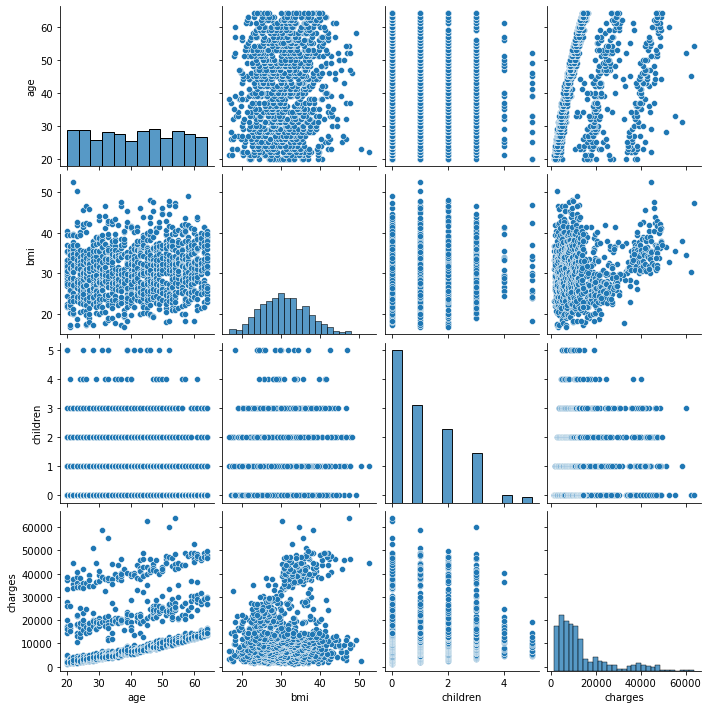

In [5]:
sns.pairplot(data)

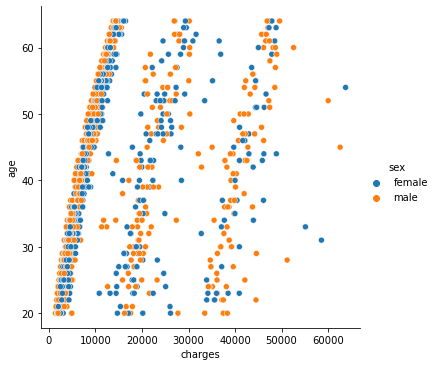

In [6]:
sns.relplot(x = 'charges', y = 'age', hue = 'sex', data=data)

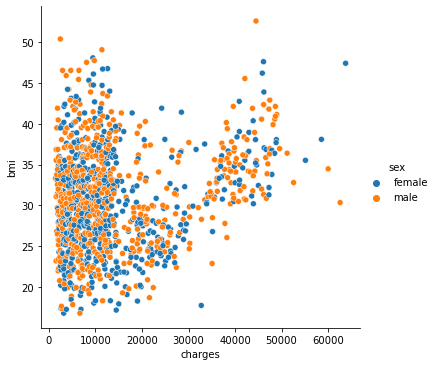

In [7]:
sns.relplot(x = 'charges', y = 'bmi', hue = 'sex', data=data)

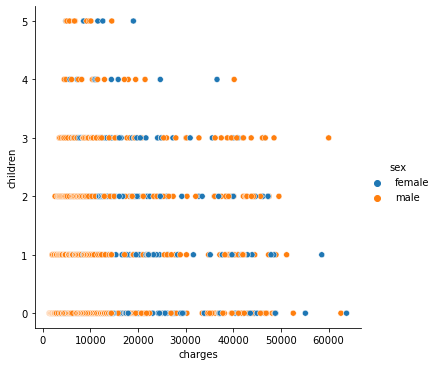

In [8]:
sns.relplot(x = 'charges', y = 'children', hue = 'sex', data=data)

<AxesSubplot:xlabel='sex', ylabel='Count'>

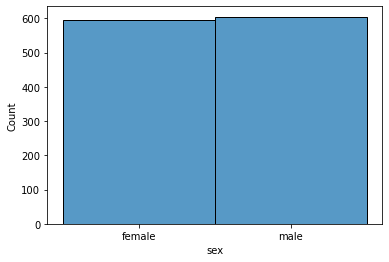

In [9]:
sns.histplot(data['sex'])

<AxesSubplot:xlabel='age', ylabel='Count'>

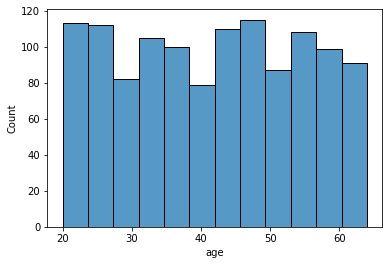

In [10]:
sns.histplot(data['age'])

<AxesSubplot:xlabel='region', ylabel='Count'>

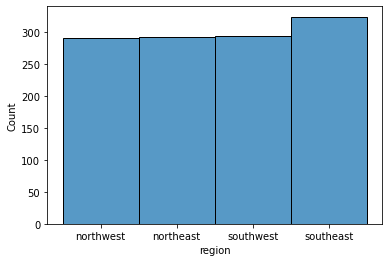

In [11]:
sns.histplot(data['region'])

<AxesSubplot:xlabel='bmi', ylabel='Count'>

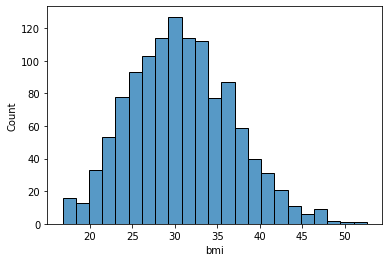

In [12]:
sns.histplot(data['bmi'])

<AxesSubplot:xlabel='children', ylabel='Count'>

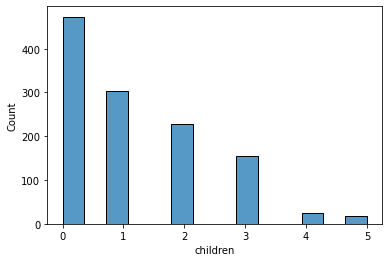

In [13]:
sns.histplot(data['children'])

<AxesSubplot:xlabel='smoker', ylabel='Count'>

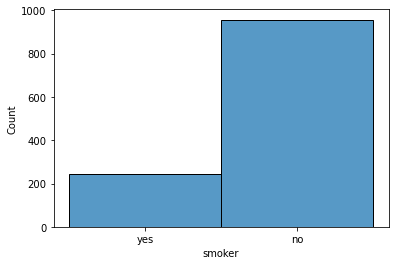

In [14]:
sns.histplot(data['smoker'])

<AxesSubplot:xlabel='charges', ylabel='Count'>

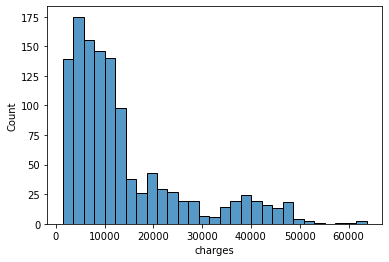

In [15]:
sns.histplot(data['charges'])

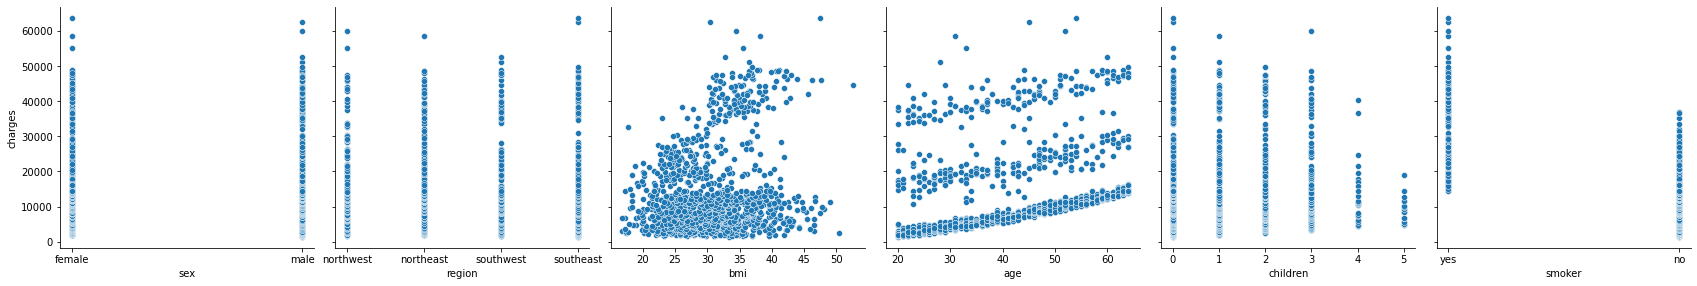

In [16]:
sns.pairplot(data, x_vars = ['sex', 'region', 'bmi', 'age', 'children', 'smoker'], y_vars = 'charges', height=4, kind='scatter')

In [17]:
x = data['age']
y = data['charges']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 100)

In [20]:
x_train

146     25
933     54
1095    60
1096    60
277     29
        ..
802     49
53      21
350     32
79      22
792     49
Name: age, Length: 960, dtype: int64

In [21]:
y_train

146      3906.12700
933     27322.73386
1095    13217.09450
1096    12638.19500
277      4433.91590
           ...     
802      9800.88820
53       1909.52745
350      4462.72180
79      33907.54800
792     10977.20630
Name: charges, Length: 960, dtype: float64

In [22]:
import statsmodels.api as sm

In [23]:
x_train_sm = sm.add_constant(x_train)

In [24]:
lr = sm.OLS(y_train, x_train_sm).fit()
lr.params

const    2111.437756
age       284.186908
dtype: float64

In [25]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     90.59
Date:                Sun, 31 Jul 2022   Prob (F-statistic):           1.39e-20
Time:                        18:50:32   Log-Likelihood:                -10361.
No. Observations:                 960   AIC:                         2.073e+04
Df Residuals:                     958   BIC:                         2.074e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2111.4378   1304.468      1.619      0.106    -448.507    4671.382
age          284.1869     29.859      9.518      0.000     225.591     342.783
==============================================================================
Omnibus:                      297.105   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              652.892
Skew:                           1.761   Prob(JB):                    1.68e-142
Kurtosis:                       4.980   Cond. No.                         150.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

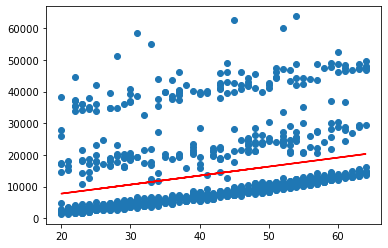

In [34]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 2111.4378 + 284.1869*x_train,'r')
plt.show()

In [35]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

C:\Users\MOSSC\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


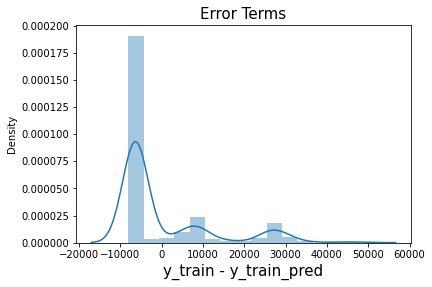

In [36]:
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title("Error Terms", fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

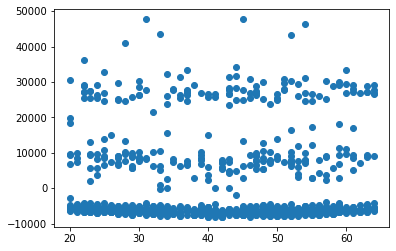

In [37]:
plt.scatter(x_train,res)
plt.show()

In [38]:
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)
y_test_pred

416     12057.979527
157      9216.110449
425     12057.979527
301     10637.044988
1026    18310.091496
            ...     
1051    18594.278404
1143    19731.026035
503     12910.540250
1189    20299.399851
44       8079.362818
Length: 241, dtype: float64

In [39]:
from sklearn.metrics import r2_score

In [40]:
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.03864276198554584

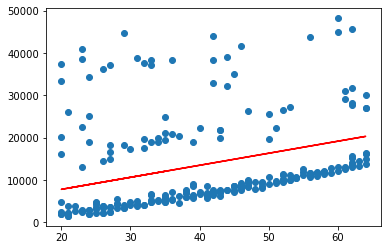

In [41]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_pred, 'r')
plt.show()